In [2]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('adult.csv')

# For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable.

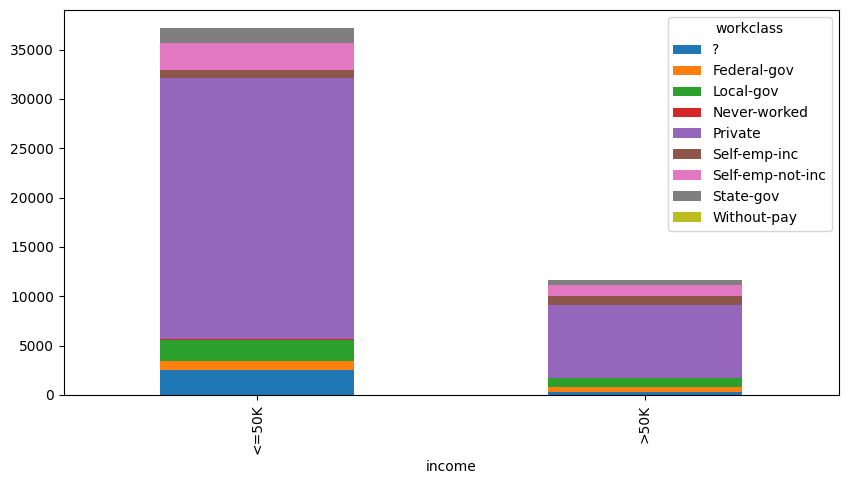

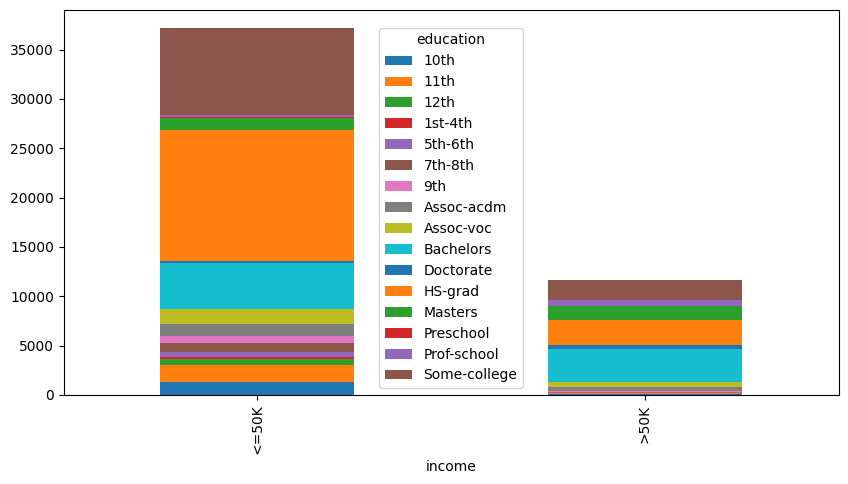

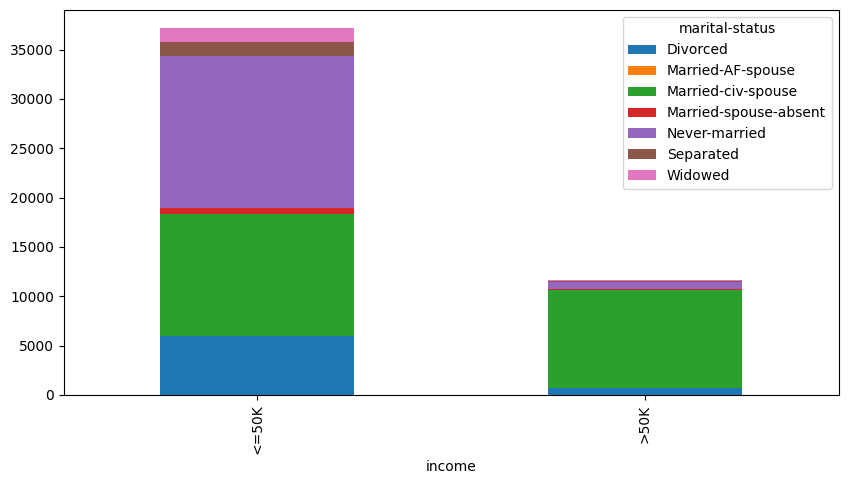

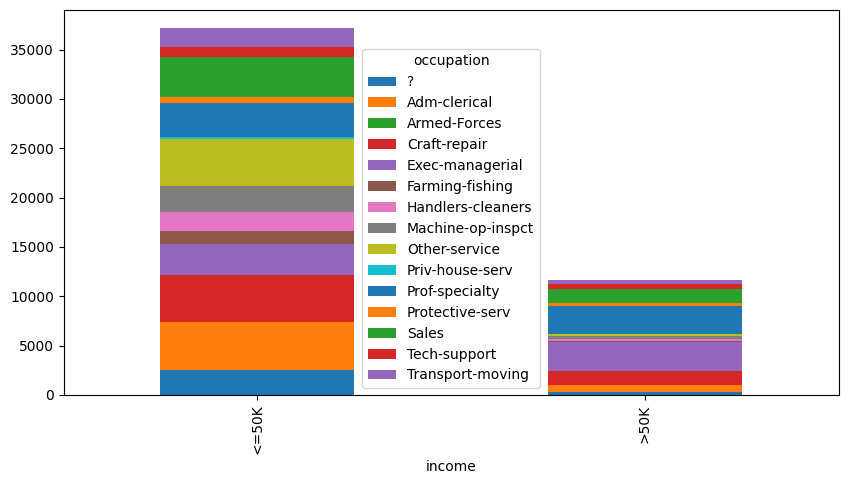

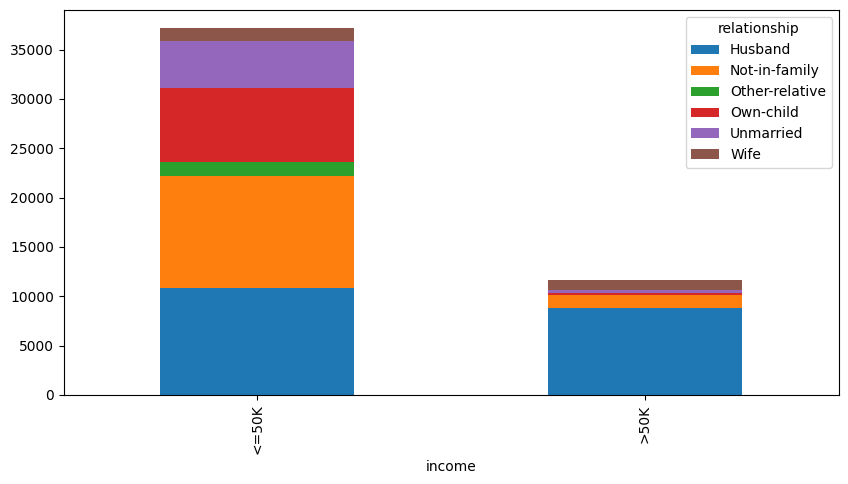

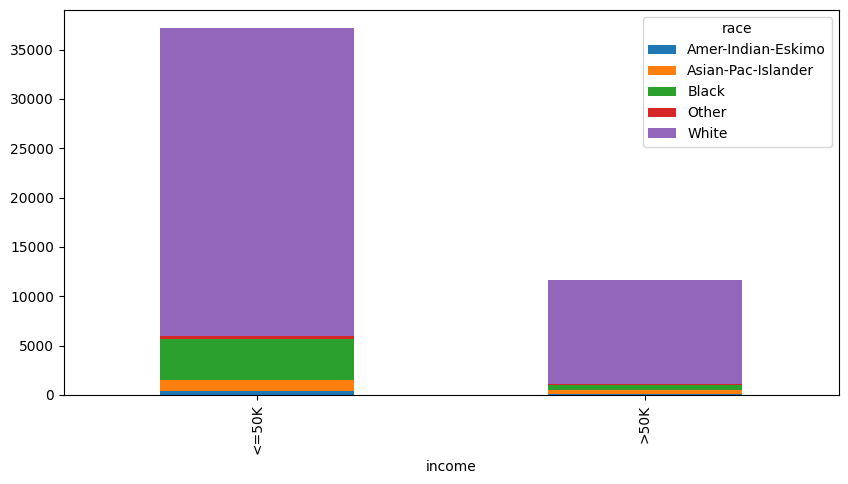

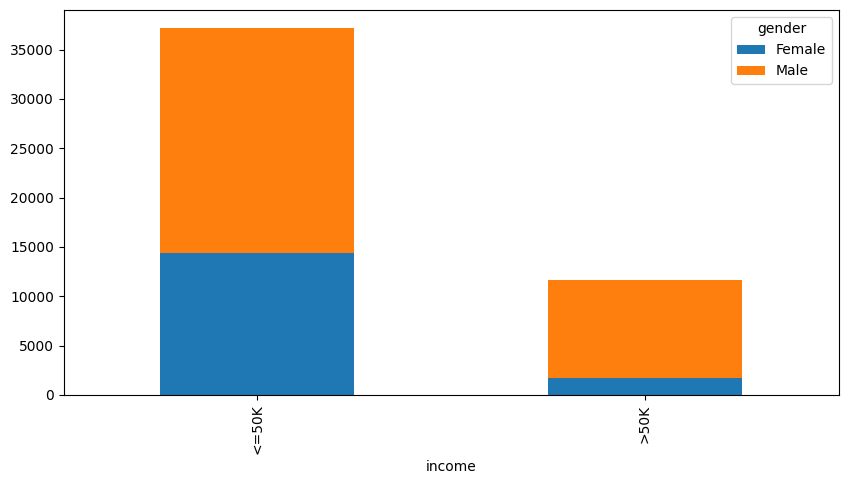

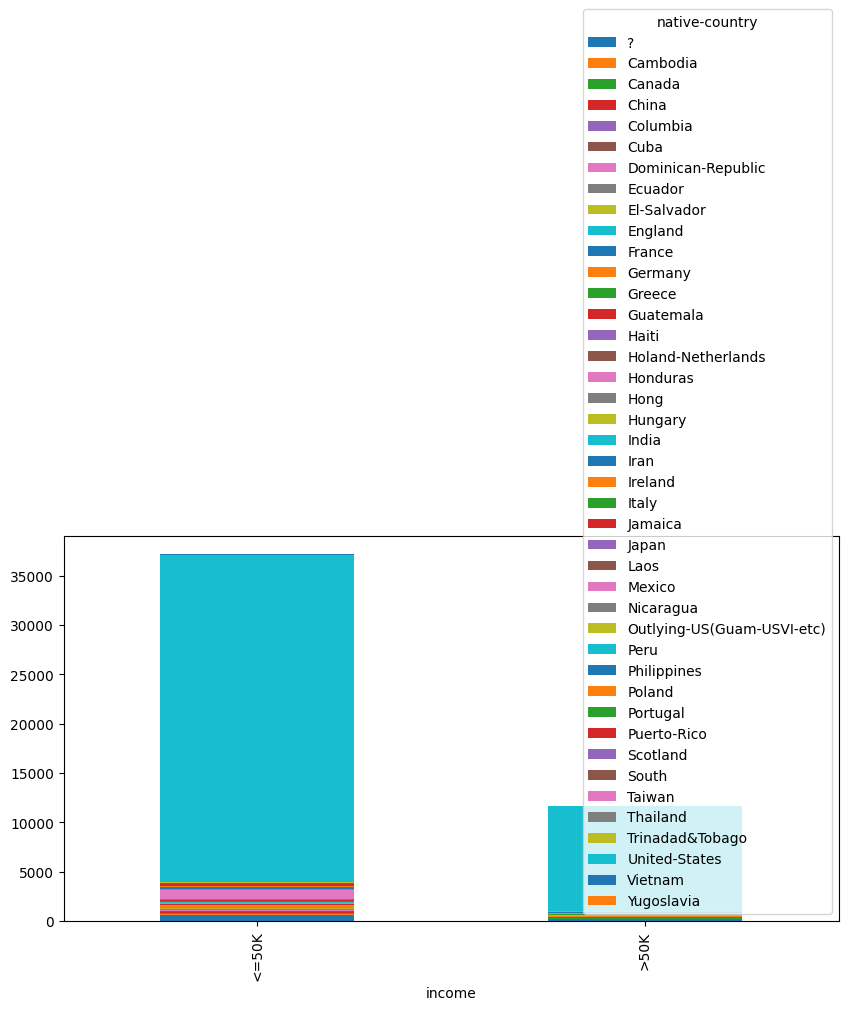

In [4]:
catagoricalData = dataset.select_dtypes(include=['object']).copy()

for column in catagoricalData:
    if column == "income":
        continue
    aggregrated = catagoricalData.groupby(["income",column])[column].count()
    
    # Plot graph
    aggregrated.unstack().plot(kind='bar',stacked=True, figsize=(10,5))
    plt.show()



In [50]:
numericalData = dataset.select_dtypes(include=['int64']).copy()
# include income column


In [ ]:
# Find max min average sd for each columns
for column in numericalData:
    print("Column: ", column)
    print("Max: ", numericalData[column].max())
    print("Min: ", numericalData[column].min())
    print("Median: ", numericalData[column].median())
    print("Average: ", numericalData[column].mean())
    print("Standard Deviation: ", numericalData[column].std())
    print()

In [ ]:
numericalData = dataset.select_dtypes(include=['int64']).copy()
numericalData['income'] = dataset['income']

for column in numericalData:
    if column == "income":
        continue

    # Histrogram with 10 bins
    numericalData[column].plot(kind='hist', bins=10)
    plt.show()

    # Normalize data
    # numericalData[column] = (numericalData[column] - numericalData[column].min()) / (numericalData[column].max() - numericalData[column].min())
    # numericalData[column] = pd.cut(numericalData[column], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

    # aggregrated = numericalData.groupby(["income",column])[column].count()

    

    # aggregrated.unstack().plot(kind='bar',stacked=True, figsize=(10,5))
    # plt.show()

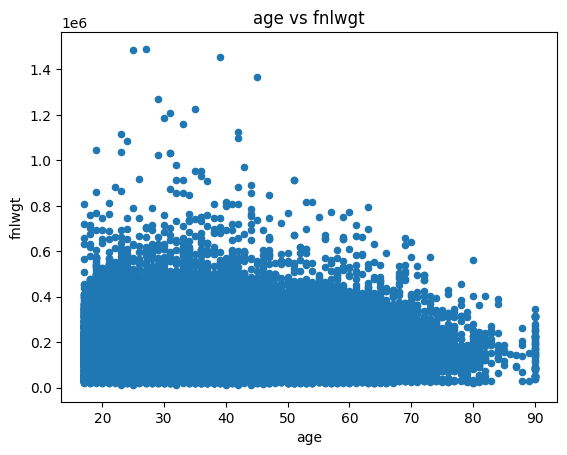

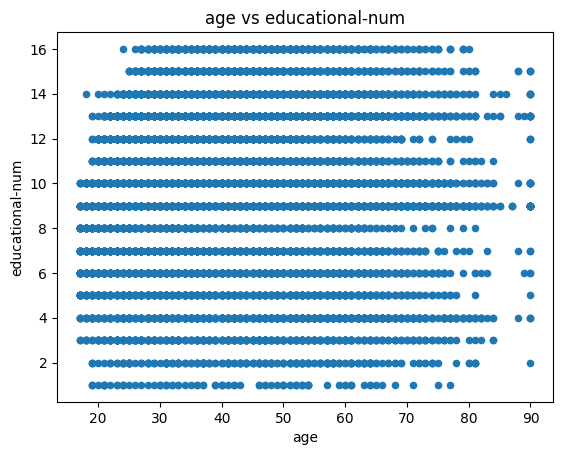

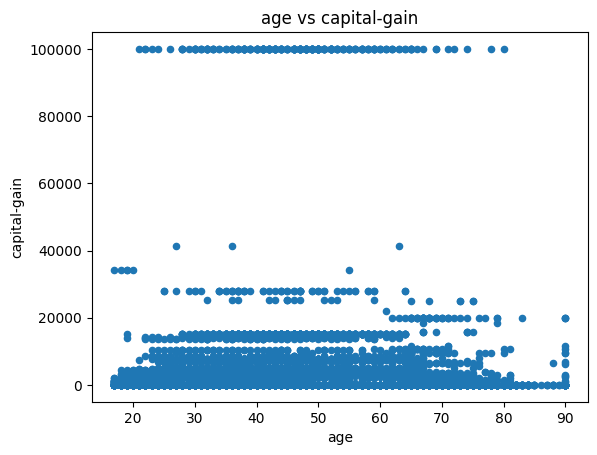

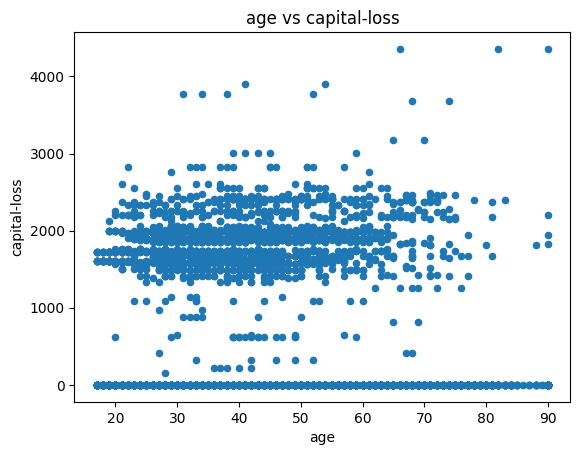

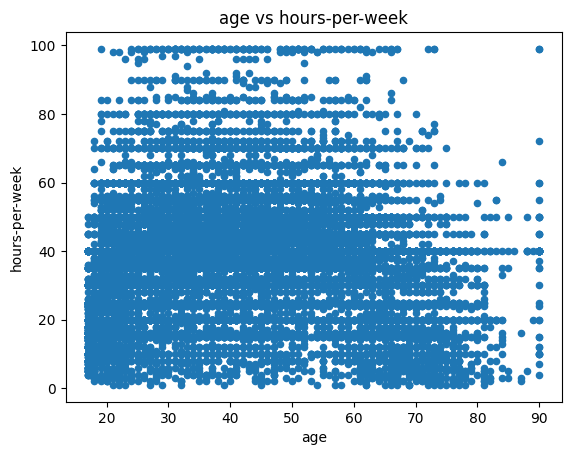

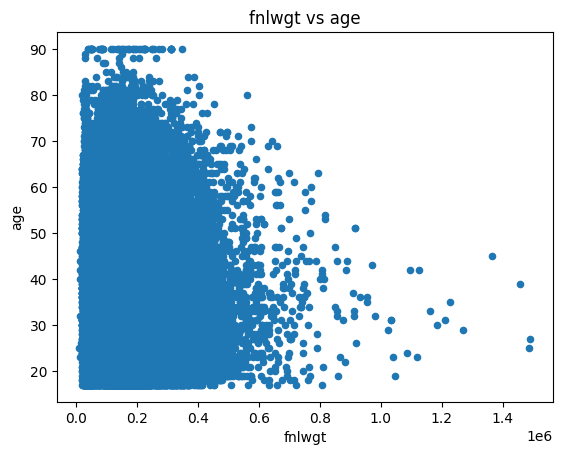

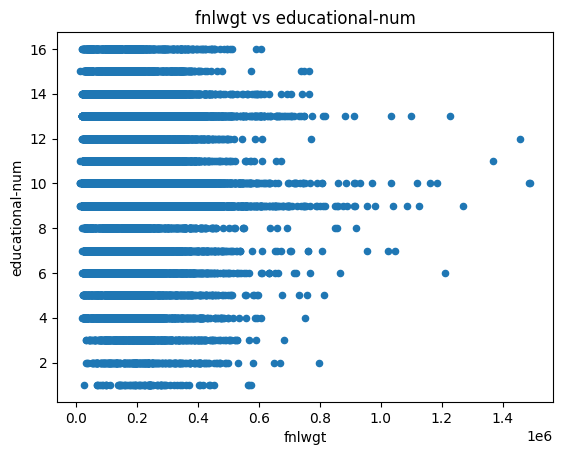

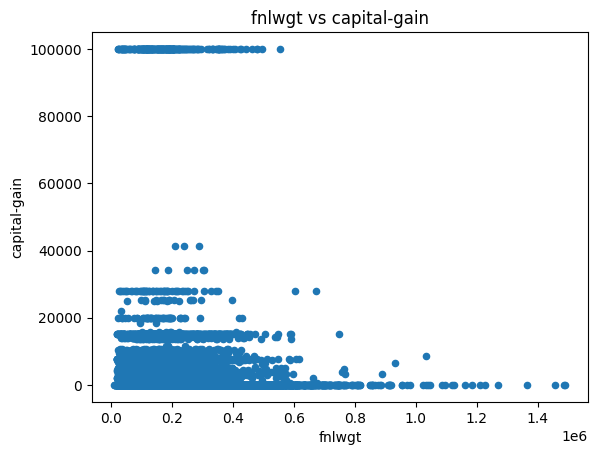

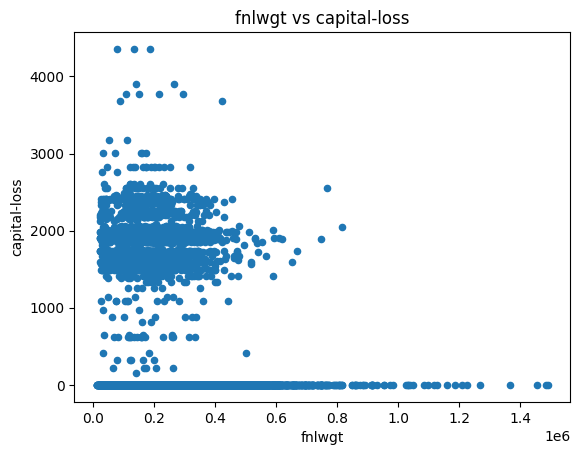

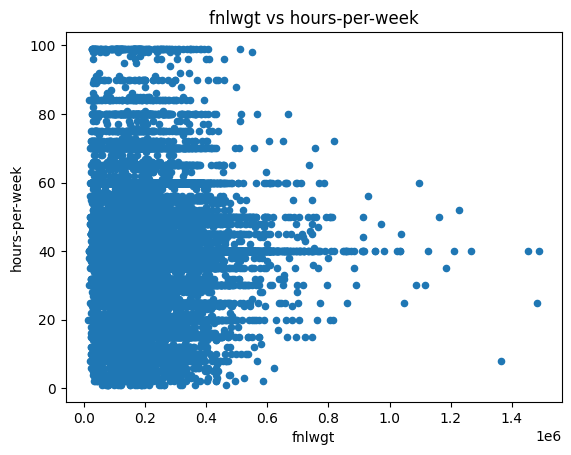

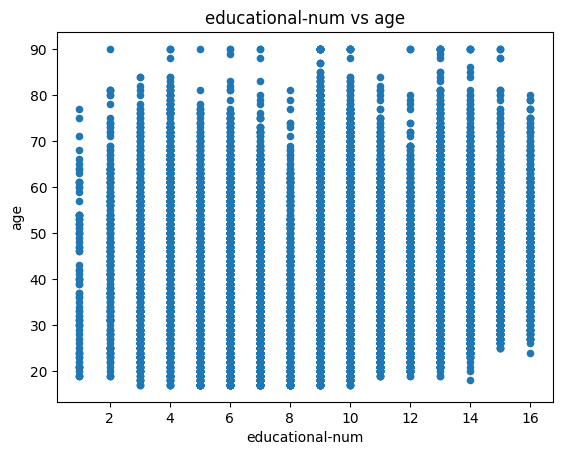

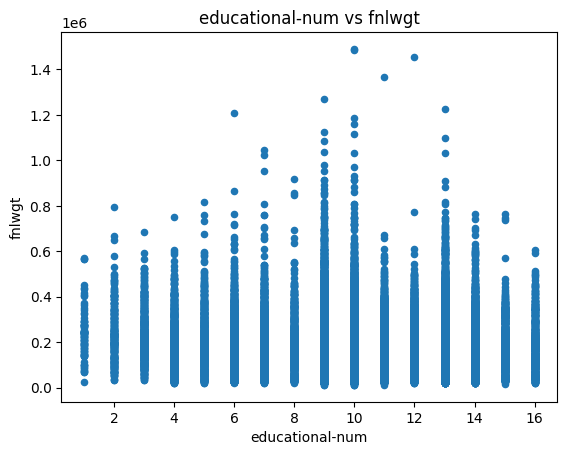

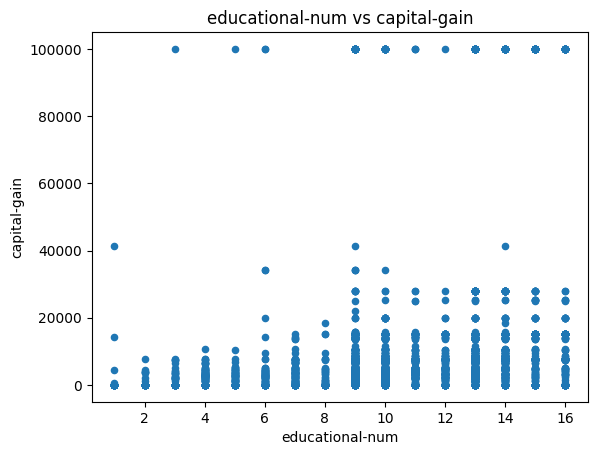

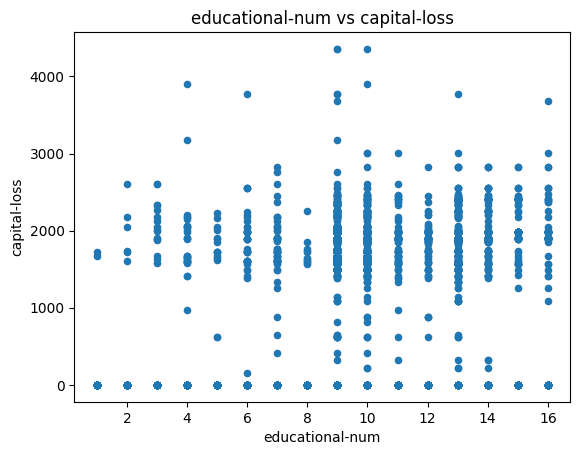

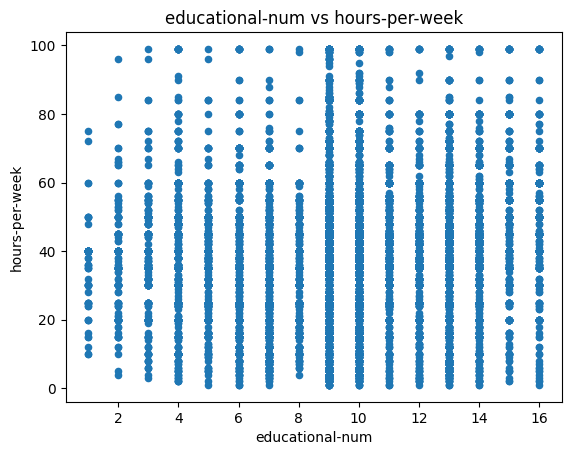

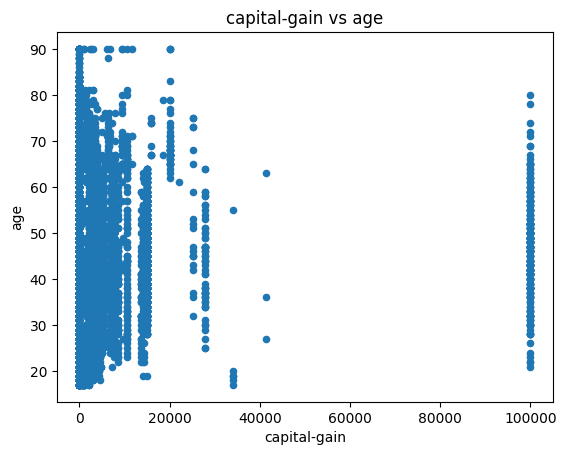

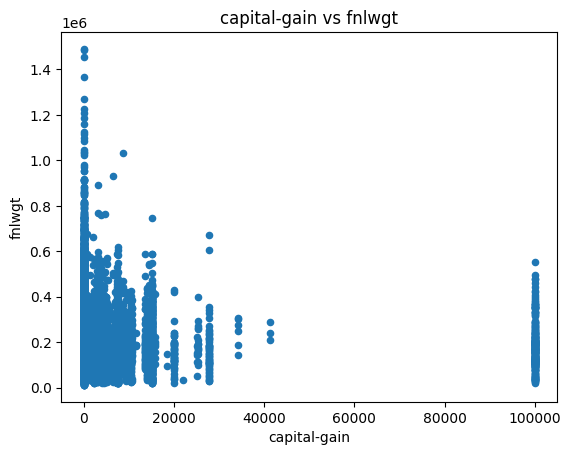

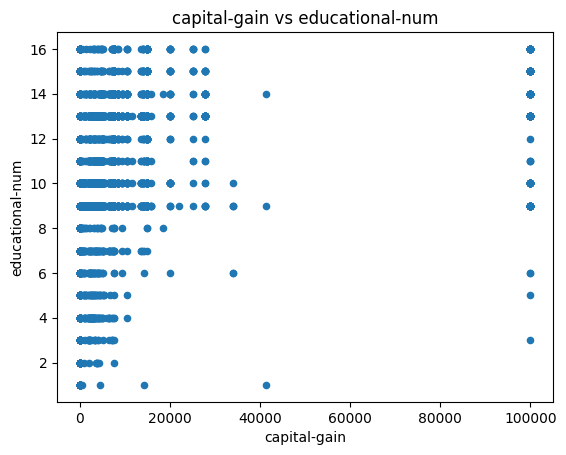

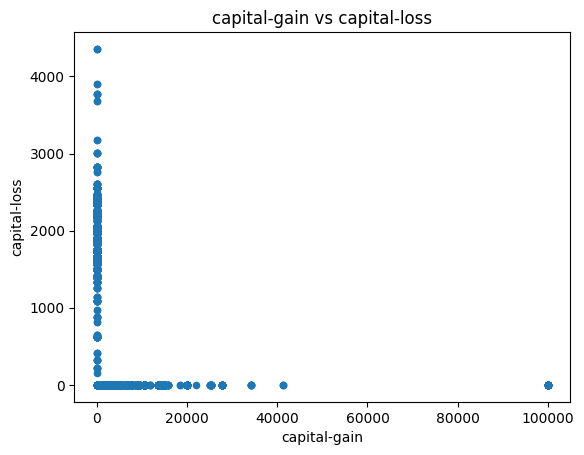

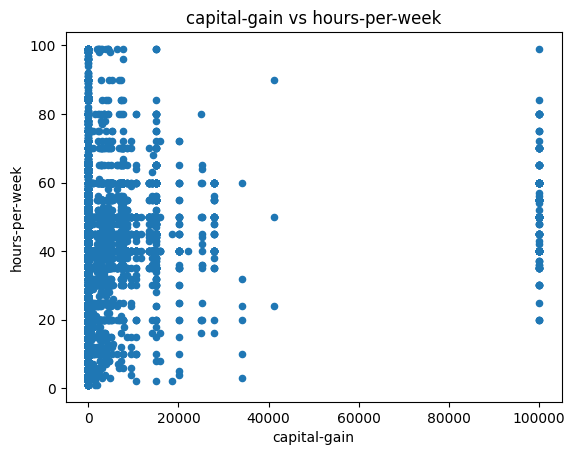

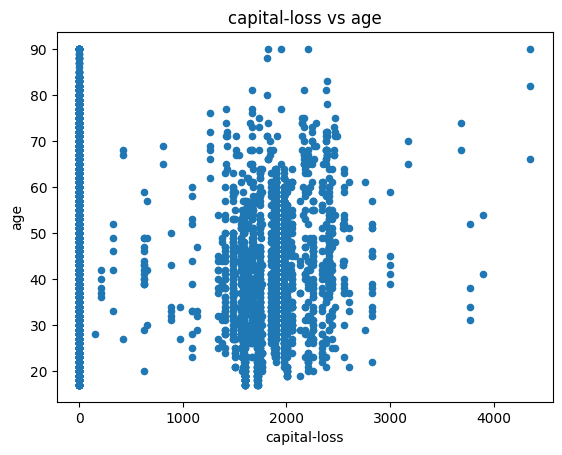

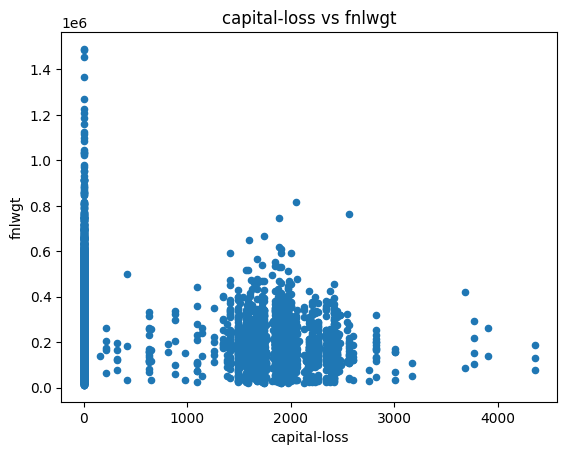

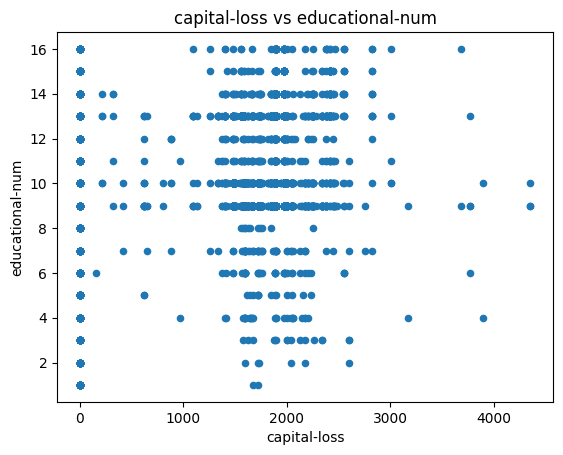

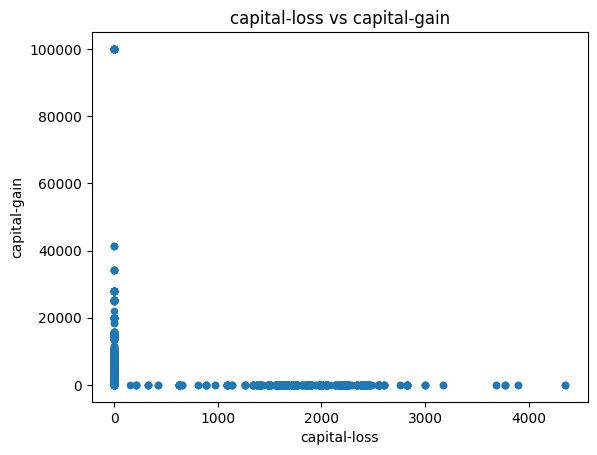

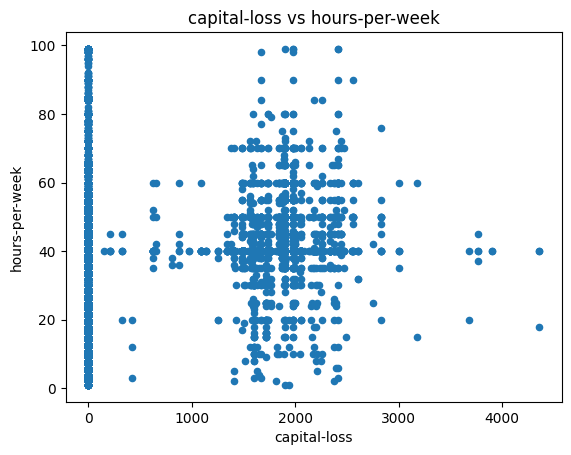

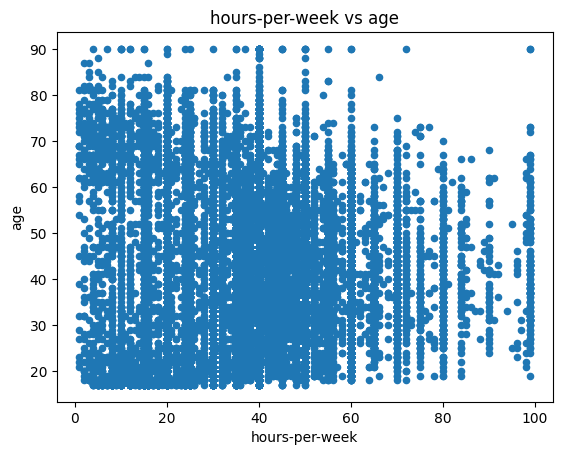

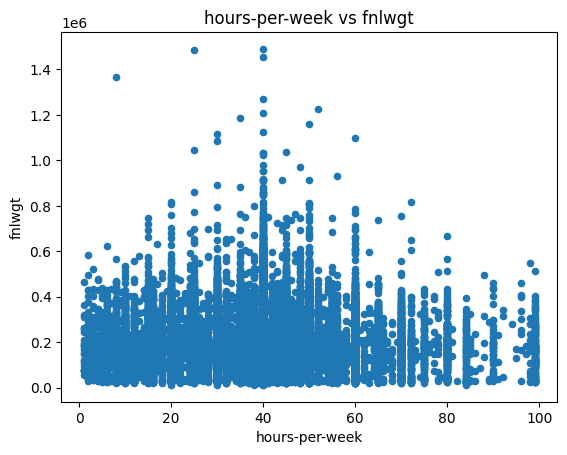

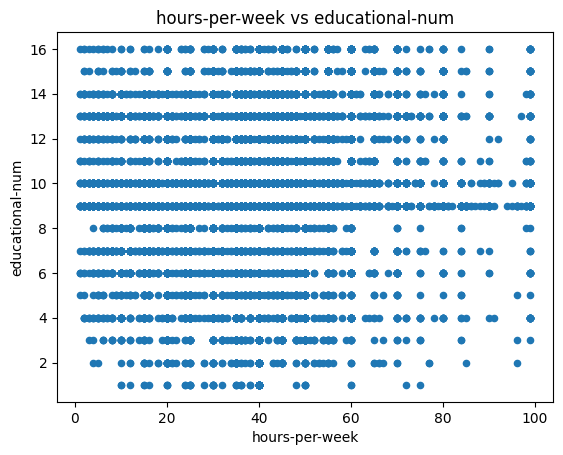

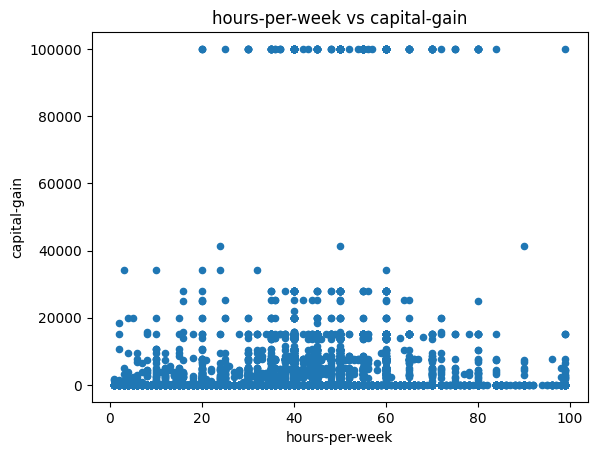

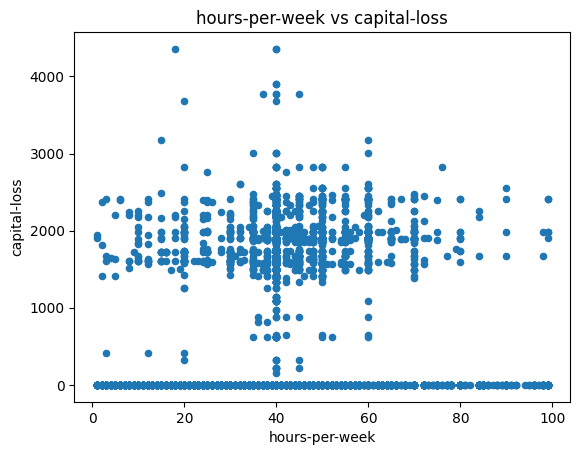

In [55]:
numericalData = dataset.select_dtypes(include=['int64']).copy()

for colX in numericalData:
    for colY in numericalData:
        if colX == colY:
            continue
        numericalData.plot.scatter(x=colX, y=colY)
        plt.title(colX + " vs " + colY)
        plt.show()
